In [1]:
# Loading libraries
import sys, os, json, re

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import os

import numpy as np
np.random.seed(123)
print("NumPy:{}".format(np.__version__))

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,10
print("Matplotlib:{}".format(mpl.__version__))

import tensorflow as tf
tf.set_random_seed(123)
print("TensorFlow:{}".format(tf.__version__))

NumPy:1.15.4
Matplotlib:3.0.2
TensorFlow:1.12.0


In [3]:
dir_path = os.path.dirname(os.path.realpath("__file__"))
DATASETSLIB_HOME = os.path.join(dir_path,'datasetslib')
print(DATASETSLIB_HOME)

import sys
if not DATASETSLIB_HOME in sys.path:
    sys.path.append(DATASETSLIB_HOME)
    
# IPython extension to reload modules before executing user code.
# autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt.
%reload_ext autoreload
%autoreload 2


import datasetslib

/notebooks/IS_w2v/datasetslib


In [4]:
from datasetslib.brexit import Brexit
brexitData = Brexit()
brexitData.loadData()

-- in Brexit --
Dataset path: ./datasets/brexit
-- End of constructor ---
-- In load data ---
Processing directory:  ./datasets/brexit
Total files 49
-------------------------------
Training file count:  49
Total files in list:  49
-------------------------------
-------------------------------
Vocab size( train ):  2067
-------------------------------
{'<Undefined>': 0, 'guernsey': 1, 'minist': 2, 'point': 3, 'brexit': 4, 'island': 5, 'politician': 6, 'updat': 7, 'deputi': 8, 'gavin': 9, 'st': 10, 'pier': 11, 'food': 12, 'shortag': 13, 'scenario': 14, 'say': 15, 'referendum': 16, 'conting': 17, 'plan': 18, 'depend': 19, 'uk': 20, 'member': 21, 'eu': 22, 'jersey': 23, 'isl': 24, 'man': 25, 'trade': 26, 'access': 27, 'treati': 28, 'area': 29, 'immigr': 30, 'transport': 31, 'energi': 32, 'cooper': 33, 'process': 34, 'parliament': 35, 'time': 36, 'peopl': 37, 'money': 38, 'govern': 39, 'prioriti': 40, 'stori': 41, 'news': 42, 'imag': 43, 'caption': 44, 'sir': 45, 'vinc': 46, 'cabl': 47, '

(None, None, None)

In [5]:

brexitData.resetIndex()
# in CBOW input is the context word and output is the target word
y_batch, x_batch = brexitData.next_batch_cbow()

print(y_batch)
print(x_batch)

skipWindow = 2

print('The CBOW pairs : context,target')
for i in range(5 * skipWindow):
    print('(', [brexitData.vocabId2Word[x_i] for x_i in x_batch[i] if x_i > -1],
          ',', y_batch[i], brexitData.vocabId2Word[y_batch[i]], ')')

[ 1  2  3  4  3  1  4  2  5  6  7  8  9 10 11  1 12 13 14 15 16  5 17 18
  8 10 11 19 20 21 22  1 23 24 25 26 22 20 27 28 29 30 31 32 33 20  4 34
  8 10 11  1 35 36 37 38 39 40 41 42  1 43 44 45 46 47 48 49 50  4 14 51
  5 12 52 17 18 53 54 20 55 26 56 57  5 58  8 10 11 59 48 49 50 60  1 12
 61 62 63 64 65  1 66 67 68 69 12 52 70  5  8 10 11 13 12 71  5 14  1 39
 72 73 12 74 75  4 76 77]
[[-1 -1  2 -1]
 [-1  1 -1 -1]
 [ 1  2 -1 -1]
 [ 2  3 -1 -1]
 [-1 -1  1  4]
 [-1  3  4  2]
 [ 3  1  2 -1]
 [ 1  4 -1 -1]
 [ 4  2 -1 -1]
 [ 2  5 -1 -1]
 [-1 -1  8  9]
 [-1  7  9 10]
 [ 7  8 10 11]
 [ 8  9 11  1]
 [ 9 10  1 12]
 [10 11 12 -1]
 [11  1 -1 -1]
 [ 1 12 -1 -1]
 [12 13 -1 -1]
 [-1 -1 16  5]
 [-1 15  5 17]
 [15 16 17 18]
 [16  5 18  8]
 [ 5 17  8 -1]
 [17 18 -1 -1]
 [18  8 -1 -1]
 [ 8 10 -1 -1]
 [-1 -1 20 -1]
 [-1 19 -1 -1]
 [19 20 -1 -1]
 [20 21 -1 -1]
 [-1 -1 23 24]
 [-1  1 24 25]
 [ 1 23 25 26]
 [23 24 26 22]
 [24 25 22 20]
 [25 26 20 -1]
 [26 22 -1 -1]
 [22 20 -1 -1]
 [20 27 -1 -1]
 [-1 -1 3

In [6]:
skipWindow = 2
brexitData.resetIndex()
# in skip-gram input is the target word and output is the context word
x_batch, y_batch = brexitData.next_batch_sg()

print('The skip-gram pairs : target,context')
for i in range(2 * skipWindow):
    print('(', x_batch[i], brexitData.vocabId2Word[x_batch[i]],
          ',', y_batch[i], brexitData.vocabId2Word[y_batch[i]], ')')

The skip-gram pairs : target,context
( 1 guernsey , 2 minist )
( 1 guernsey , 3 point )
( 2 minist , 1 guernsey )
( 2 minist , 3 point )


In [7]:
valid_size = 8

x_valid = np.random.choice(valid_size * 10, valid_size, replace=False)
print('valid: ',x_valid)

valid:  [64 58 59  4 69 53 31 77]


In [8]:
batch_size = 128 * 4
embedding_size = 128 * 4
n_negative_samples = 64


# clear the effects of previous sessions in the Jupyter Notebook
tf.reset_default_graph()

inputs = tf.placeholder(dtype=tf.int32, shape=[batch_size])
outputs = tf.placeholder(dtype=tf.int32, shape=[batch_size,1])
inputs_valid = tf.constant(x_valid, dtype=tf.int32)

In [9]:
# define embeddings matrix with vocab_len rows and embedding_size columns
# each row represents vectore representation or embedding of a word
# in the vocbulary

embed_dist = tf.random_uniform(shape=[brexitData.vocab_size, embedding_size],
                               minval=-1.0,
                               maxval=1.0
                               )
embed_matrix = tf.Variable(embed_dist,
                           name='embed_matrix'
                           )
# define the embedding lookup table
# provides the embeddings of the word ids in the input tensor
embed_ltable = tf.nn.embedding_lookup(embed_matrix, inputs)

In [10]:
# define noise-contrastive estimation (NCE) loss layer

nce_dist = tf.truncated_normal(shape=[brexitData.vocab_size, embedding_size],
                               stddev=1.0 /
                               tf.sqrt(embedding_size * 1.0)
                               )
nce_w = tf.Variable(nce_dist)
nce_b = tf.Variable(tf.zeros(shape=[brexitData.vocab_size]))

loss = tf.reduce_mean(tf.nn.nce_loss(weights=nce_w,
                                     biases=nce_b,
                                     inputs=embed_ltable,
                                     labels=outputs,
                                     num_sampled=n_negative_samples,
                                     num_classes=brexitData.vocab_size
                                     )
                      )

In [11]:
# Compute the cosine similarity between validation set samples
# and all embeddings.
norm = tf.sqrt(tf.reduce_sum(tf.square(embed_matrix), 1, 
                             keep_dims=True))
normalized_embeddings = embed_matrix / norm
embed_valid = tf.nn.embedding_lookup(normalized_embeddings, 
                                     inputs_valid)
similarity = tf.matmul(
    embed_valid, normalized_embeddings, transpose_b=True)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
n_epochs = 1000
learning_rate = 0.5
n_batches = brexitData.n_batches_wv()
print('Batches: ', n_batches)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as tfs:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        epoch_loss = 0
        brexitData.resetIndex()
        for step in range(n_batches):
            x_batch, y_batch = brexitData.next_batch_sg()
            #print(x_batch)
            #print('----------')
            #print(y_batch)
            #print('----------')
            y_batch = brexitData.to2d(y_batch, unit_axis=1)
            feed_dict = {inputs: x_batch, outputs: y_batch}
            _, batch_loss = tfs.run([optimizer, loss], feed_dict=feed_dict)
            epoch_loss += batch_loss
        epoch_loss = epoch_loss / n_batches
        print('\nAverage loss after epoch ', epoch, ': ', epoch_loss)

        # print closest words to validation set at end of every epoch
        similarity_scores = tfs.run(similarity)
        top_k = 5
        for i in range(valid_size):
            similar_words = (-similarity_scores[i, :]
                             ).argsort()[1:top_k + 1]
            similar_str = 'Similar to {0:}:'.format(
                brexitData.vocabId2Word[x_valid[i]])
            for k in range(top_k):
                similar_str = '{0:} {1:},'.format(
                    similar_str, brexitData.vocabId2Word[similar_words[k]])
            print(similar_str)
    final_embeddings = tfs.run(normalized_embeddings)

Batches:  16

Average loss after epoch  0 :  142.7156548500061
Similar to theresa: alert, addit, green, benefit, cross,
Similar to week: varadkar, counti, shore, domin, minist,
Similar to concern: allgemein, profit, request, olaf, handelsblatt,
Similar to brexit: subject, meat, ehic, junctur, resourc,
Similar to medicin: competit, women, idea, malmstrom, consensu,
Similar to law: summit, sancerr, countri, psni, referendum,
Similar to transport: perri, quick, copyrightla, econom, sophi,
Similar to channel: kent, propos, nonstart, review, captionjon,

Average loss after epoch  1 :  115.55993175506592
Similar to theresa: alert, cross, benefit, green, addit,
Similar to week: varadkar, counti, shore, minist, domin,
Similar to concern: allgemein, profit, request, olaf, handelsblatt,
Similar to brexit: subject, meat, ehic, world, junctur,
Similar to medicin: competit, women, idea, malmstrom, consensu,
Similar to law: summit, sancerr, countri, psni, referendum,
Similar to transport: quick, per


Average loss after epoch  18 :  12.848123490810394
Similar to theresa: mp, alert, cross, benefit, manufactur,
Similar to week: minist, domin, arlen, leaveeu, labour,
Similar to concern: allgemein, profit, request, captiongeoffrey, handelsblatt,
Similar to brexit: eujapan, futur, month, world, rout,
Similar to medicin: competit, idea, women, may, malmstrom,
Similar to law: countri, referendum, mp, union, minist,
Similar to transport: peopl, copyrightla, andrew, nicki, quick,
Similar to channel: propos, deal, capac, support, govern,

Average loss after epoch  19 :  14.110218197107315
Similar to theresa: alert, mp, cross, benefit, manufactur,
Similar to week: minist, domin, arlen, leaveeu, labour,
Similar to concern: allgemein, profit, request, captiongeoffrey, handelsblatt,
Similar to brexit: eujapan, futur, month, rout, world,
Similar to medicin: competit, idea, may, women, malmstrom,
Similar to law: countri, referendum, mp, union, minist,
Similar to transport: peopl, copyrightla, andr


Average loss after epoch  36 :  4.175358533859253
Similar to theresa: alert, benefit, cross, mp, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, labour,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, futur, month, europ, meat,
Similar to medicin: competit, idea, malmstrom, may, declar,
Similar to law: sancerr, countri, referendum, capac, union,
Similar to transport: copyrightla, nicki, peopl, andrew, cost,
Similar to channel: propos, capac, deal, support, nonstart,

Average loss after epoch  37 :  4.413203671574593
Similar to theresa: alert, benefit, cross, mp, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, labour,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, futur, month, europ, meat,
Similar to medicin: competit, idea, malmstrom, may, declar,
Similar to law: sancerr, countri, referendum, capac, union,
Similar to transport: copyrightla, ni


Average loss after epoch  52 :  2.41727364808321
Similar to theresa: alert, benefit, cross, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, futur, meat, europ, korea,
Similar to medicin: competit, idea, malmstrom, may, declar,
Similar to law: sancerr, countri, referendum, capac, union,
Similar to transport: copyrightla, nicki, andrew, peopl, cost,
Similar to channel: propos, capac, nonstart, deal, support,

Average loss after epoch  53 :  2.4845669716596603
Similar to theresa: alert, benefit, cross, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, futur, meat, month, korea,
Similar to medicin: competit, idea, malmstrom, may, declar,
Similar to law: sancerr, countri, referendum, capac, union,
Similar to transport: copyrightla, 


Average loss after epoch  70 :  2.107487738132477
Similar to theresa: alert, benefit, cross, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, futur, korea, month,
Similar to medicin: competit, idea, malmstrom, may, declar,
Similar to law: sancerr, referendum, countri, capac, union,
Similar to transport: copyrightla, nicki, andrew, peopl, cost,
Similar to channel: propos, capac, nonstart, deal, start,

Average loss after epoch  71 :  2.08998791128397
Similar to theresa: alert, benefit, cross, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, futur, korea, cover,
Similar to medicin: competit, idea, malmstrom, may, declar,
Similar to law: sancerr, referendum, countri, capac, union,
Similar to transport: copyrightla, nic


Average loss after epoch  88 :  2.011138439178467
Similar to theresa: alert, benefit, cross, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, futur, cover, korea,
Similar to medicin: competit, idea, malmstrom, may, declar,
Similar to law: sancerr, countri, referendum, capac, union,
Similar to transport: copyrightla, nicki, andrew, cost, peopl,
Similar to channel: propos, nonstart, capac, start, support,

Average loss after epoch  89 :  1.8808527141809464
Similar to theresa: alert, benefit, cross, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, futur, cover, korea,
Similar to medicin: competit, idea, malmstrom, may, declar,
Similar to law: sancerr, countri, referendum, capac, union,
Similar to transport: copyrightla


Average loss after epoch  103 :  1.7728021442890167
Similar to theresa: alert, benefit, cross, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, futur, cover, korea,
Similar to medicin: competit, idea, malmstrom, may, consensu,
Similar to law: sancerr, referendum, countri, capac, union,
Similar to transport: copyrightla, nicki, andrew, cost, bastidon,
Similar to channel: propos, nonstart, capac, start, support,

Average loss after epoch  104 :  1.9393068924546242
Similar to theresa: alert, benefit, cross, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, futur, cover, korea,
Similar to medicin: competit, idea, malmstrom, may, consensu,
Similar to law: sancerr, countri, referendum, capac, union,
Similar to transport: c


Average loss after epoch  118 :  1.7494072392582893
Similar to theresa: alert, cross, benefit, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, futur, cover, korea,
Similar to medicin: competit, idea, malmstrom, may, consensu,
Similar to law: sancerr, referendum, countri, capac, union,
Similar to transport: copyrightla, nicki, andrew, cost, bastidon,
Similar to channel: propos, nonstart, capac, start, support,

Average loss after epoch  119 :  1.8110979348421097
Similar to theresa: alert, cross, benefit, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, futur, cover, europ,
Similar to medicin: competit, idea, malmstrom, may, consensu,
Similar to law: sancerr, referendum, countri, capac, union,
Similar to transport: c


Average loss after epoch  133 :  1.7540089711546898
Similar to theresa: alert, cross, benefit, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, futur, cover, korea,
Similar to medicin: competit, idea, malmstrom, may, consensu,
Similar to law: sancerr, referendum, countri, capac, union,
Similar to transport: copyrightla, nicki, andrew, bastidon, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  134 :  1.7191730961203575
Similar to theresa: alert, cross, benefit, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, futur, cover, korea,
Similar to medicin: competit, idea, malmstrom, may, consensu,
Similar to law: sancerr, referendum, countri, capac, union,
Similar to transport: co


Average loss after epoch  148 :  1.770074874162674
Similar to theresa: alert, cross, benefit, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, futur, cover, laura,
Similar to medicin: competit, idea, malmstrom, may, consensu,
Similar to law: sancerr, referendum, countri, capac, union,
Similar to transport: copyrightla, nicki, andrew, bastidon, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  149 :  1.743551030755043
Similar to theresa: alert, cross, benefit, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, futur, cover, laura,
Similar to medicin: competit, idea, malmstrom, may, consensu,
Similar to law: sancerr, referendum, countri, capac, union,
Similar to transport: copy


Average loss after epoch  163 :  1.72822555154562
Similar to theresa: alert, cross, benefit, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, futur, cover, gdp,
Similar to medicin: competit, idea, malmstrom, may, consensu,
Similar to law: sancerr, referendum, countri, capac, union,
Similar to transport: copyrightla, nicki, andrew, bastidon, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  164 :  1.7489598393440247
Similar to theresa: alert, cross, benefit, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, futur, cover, gdp,
Similar to medicin: competit, idea, malmstrom, may, consensu,
Similar to law: sancerr, referendum, countri, capac, union,
Similar to transport: copyrigh


Average loss after epoch  178 :  1.721696250140667
Similar to theresa: alert, cross, benefit, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, futur, gdp,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, countri, capac, union,
Similar to transport: copyrightla, nicki, andrew, bastidon, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  179 :  1.6978745311498642
Similar to theresa: alert, cross, benefit, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, futur, gdp,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, union,
Similar to transport: copyrig


Average loss after epoch  193 :  1.7076952680945396
Similar to theresa: alert, cross, benefit, addit, pacificbord,
Similar to week: minist, domin, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, futur, gdp,
Similar to medicin: competit, idea, malmstrom, may, consensu,
Similar to law: sancerr, referendum, countri, capac, union,
Similar to transport: copyrightla, nicki, andrew, bastidon, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  194 :  1.65354572981596
Similar to theresa: alert, cross, benefit, addit, pacificbord,
Similar to week: minist, domin, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, futur, gdp,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, countri, capac, union,
Similar to transport: copyrigh


Average loss after epoch  208 :  1.6968453750014305
Similar to theresa: alert, cross, benefit, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, futur,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, month,
Similar to transport: copyrightla, nicki, andrew, bastidon, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  209 :  1.6883440613746643
Similar to theresa: alert, cross, benefit, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, futur,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, month,
Similar to transport: copyri


Average loss after epoch  225 :  1.6638171672821045
Similar to theresa: alert, benefit, cross, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, futur,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, andrew, bastidon, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  226 :  1.724540926516056
Similar to theresa: alert, benefit, cross, addit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, futur,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transp


Average loss after epoch  240 :  1.6593141555786133
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, futur,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, andrew, bastidon, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  241 :  1.7428272143006325
Similar to theresa: alert, addit, benefit, cross, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, futur,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to trans


Average loss after epoch  255 :  1.6055291593074799
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, futur,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  256 :  1.6890894323587418
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: minist, domin, arlen, leaveeu, vadi,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, futur,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to trans


Average loss after epoch  270 :  1.692322313785553
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: minist, domin, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, europ,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  271 :  1.5934456586837769
Similar to theresa: alert, addit, benefit, cross, pacificbord,
Similar to week: minist, domin, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, europ,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar t


Average loss after epoch  285 :  1.6777026653289795
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: minist, domin, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, europ,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  286 :  1.5903783664107323
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, laura,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to trans


Average loss after epoch  300 :  1.6470832750201225
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: minist, domin, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, laura,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  301 :  1.6447073966264725
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: minist, domin, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, laura,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to trans


Average loss after epoch  315 :  1.6986546143889427
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  316 :  1.6637220531702042
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  330 :  1.6954658702015877
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: minist, domin, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, laura,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  331 :  1.5753514170646667
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: minist, domin, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar 


Average loss after epoch  345 :  1.6002059504389763
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: minist, domin, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  346 :  1.6153283566236496
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: minist, domin, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, laura,
Similar to medicin: competit, idea, malmstrom, consensu, may,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar 


Average loss after epoch  360 :  1.6346903890371323
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  361 :  1.6214848011732101
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: minist, domin, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  375 :  1.6863445863127708
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: minist, domin, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  376 :  1.5581864789128304
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  390 :  1.6188459619879723
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  391 :  1.6141780987381935
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  407 :  1.6479749903082848
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  408 :  1.5810858756303787
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  423 :  1.7146072089672089
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  424 :  1.6215545609593391
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  438 :  1.5391997247934341
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  439 :  1.6133419126272202
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  453 :  1.565412312746048
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  454 :  1.5542267188429832
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, cover, gdp, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
S


Average loss after epoch  468 :  1.6078644320368767
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  469 :  1.7647962868213654
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  483 :  1.5955937877297401
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  484 :  1.5743463933467865
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,



Average loss after epoch  498 :  1.6030435338616371
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  499 :  1.6166697517037392
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  513 :  1.6917382329702377
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  514 :  1.5760343596339226
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,



Average loss after epoch  530 :  1.5674496740102768
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  531 :  1.6625898741185665
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, arlen, vadi, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  545 :  1.5803059116005898
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  546 :  1.6279148310422897
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  562 :  1.5517657101154327
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  563 :  1.5115649029612541
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,



Average loss after epoch  577 :  1.612052507698536
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  578 :  1.5476773977279663
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, captiongeoffrey, handelsblatt, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
S


Average loss after epoch  592 :  1.609648123383522
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  593 :  1.6009348258376122
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
S


Average loss after epoch  607 :  1.5509297773241997
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  608 :  1.6083044558763504
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  622 :  1.550813615322113
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  623 :  1.629264585673809
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Si


Average loss after epoch  637 :  1.6079766973853111
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, cost, andrew,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  638 :  1.6044160351157188
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  652 :  1.6039208322763443
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, cost, andrew,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  653 :  1.618305690586567
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
S


Average loss after epoch  669 :  1.6288776248693466
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  670 :  1.598746545612812
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,
S


Average loss after epoch  684 :  1.5157174840569496
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  685 :  1.5256371051073074
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  699 :  1.5751113444566727
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  700 :  1.586621142923832
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
S


Average loss after epoch  714 :  1.6057460084557533
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  715 :  1.6088863983750343
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  729 :  1.6454798802733421
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  730 :  1.5659396722912788
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  745 :  1.5385746732354164
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  746 :  1.5781803280115128
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,



Average loss after epoch  760 :  1.4577316716313362
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  761 :  1.5037224516272545
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  777 :  1.739029161632061
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, cost, andrew,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  778 :  1.6562637761235237
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,
S


Average loss after epoch  792 :  1.6222741305828094
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, start, review,

Average loss after epoch  793 :  1.5768608301877975
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  808 :  1.6624050661921501
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, review, start,

Average loss after epoch  809 :  1.5724598169326782
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  825 :  1.6897407621145248
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, cost, andrew,
Similar to channel: propos, nonstart, capac, review, start,

Average loss after epoch  826 :  1.6212316155433655
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  840 :  1.6176460161805153
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, cost, andrew,
Similar to channel: propos, nonstart, capac, review, start,

Average loss after epoch  841 :  1.5786268934607506
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  855 :  1.6625518277287483
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, andrew, cost,
Similar to channel: propos, nonstart, capac, review, start,

Average loss after epoch  856 :  1.4900232776999474
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,



Average loss after epoch  870 :  1.5914950221776962
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, cost, andrew,
Similar to channel: propos, nonstart, capac, review, start,

Average loss after epoch  871 :  1.6128516718745232
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  885 :  1.6045282259583473
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, control,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, cost, andrew,
Similar to channel: propos, nonstart, capac, review, start,

Average loss after epoch  886 :  1.5350021719932556
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman


Average loss after epoch  901 :  1.5559798330068588
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, cost, andrew,
Similar to channel: propos, nonstart, capac, review, start,

Average loss after epoch  902 :  1.6199215836822987
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, europ,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,



Average loss after epoch  916 :  1.5413300171494484
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, europ,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, cost, andrew,
Similar to channel: propos, nonstart, capac, review, start,

Average loss after epoch  917 :  1.660416066646576
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,
S


Average loss after epoch  931 :  1.5431955009698868
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, control,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, cost, andrew,
Similar to channel: propos, nonstart, capac, review, start,

Average loss after epoch  932 :  1.4946758970618248
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, control,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswom


Average loss after epoch  946 :  1.5555930472910404
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, control,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, cost, andrew,
Similar to channel: propos, nonstart, capac, review, start,

Average loss after epoch  947 :  1.6221092492341995
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, control,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswom


Average loss after epoch  961 :  1.5174087956547737
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, cost, andrew,
Similar to channel: propos, nonstart, capac, review, start,

Average loss after epoch  962 :  1.5729483589529991
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,



Average loss after epoch  976 :  1.591541089117527
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, control,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, cost, andrew,
Similar to channel: propos, nonstart, capac, review, start,

Average loss after epoch  977 :  1.5813558474183083
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, control,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoma


Average loss after epoch  992 :  1.5743647292256355
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, capac, referendum, countri, spokeswoman,
Similar to transport: copyrightla, nicki, bastidon, cost, andrew,
Similar to channel: propos, nonstart, capac, review, start,

Average loss after epoch  993 :  1.5249688997864723
Similar to theresa: alert, addit, cross, benefit, pacificbord,
Similar to week: domin, minist, vadi, arlen, leaveeu,
Similar to concern: allgemein, profit, handelsblatt, captiongeoffrey, import,
Similar to brexit: eujapan, meat, gdp, cover, laura,
Similar to medicin: competit, idea, malmstrom, consensu, switzerland,
Similar to law: sancerr, referendum, capac, countri, spokeswoman,


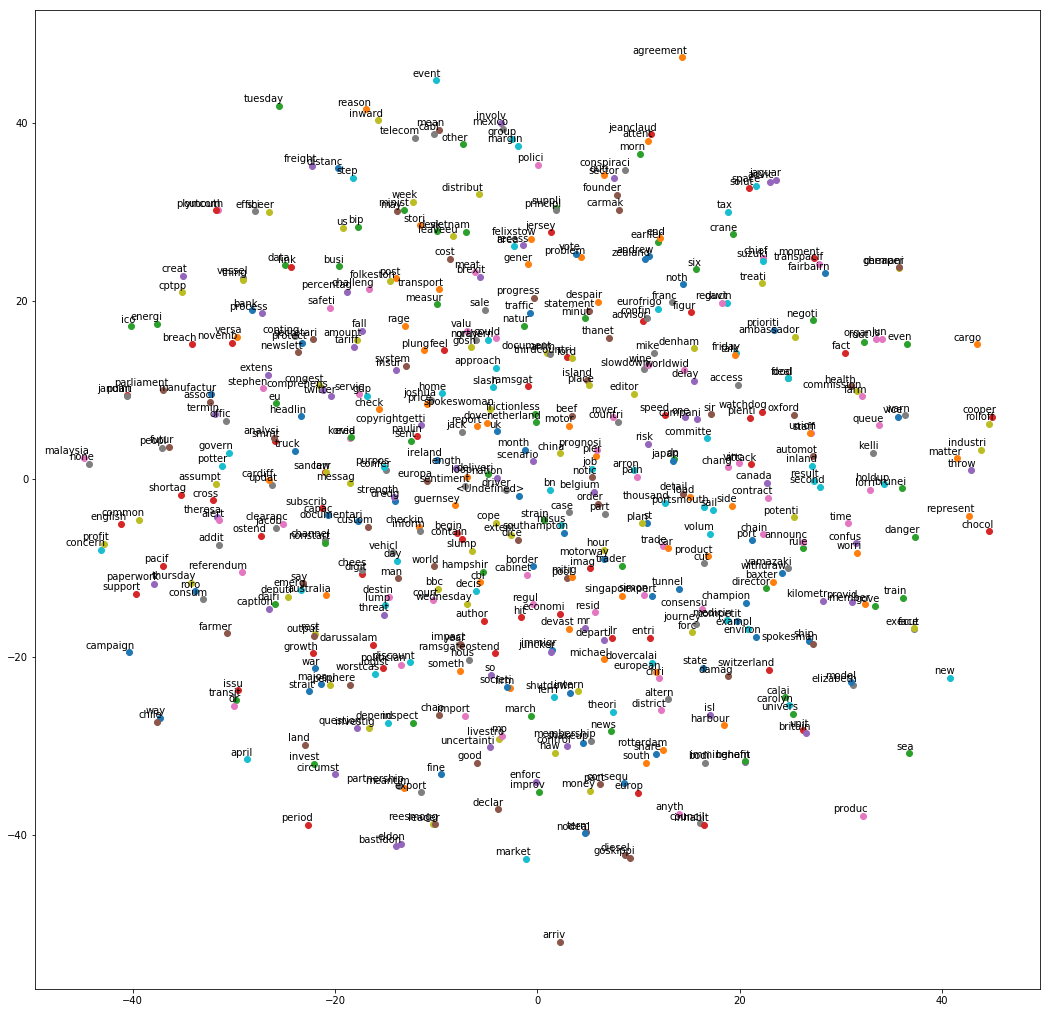

In [13]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(
        labels), 'More labels than embeddings'
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(perplexity=30, n_components=2,
            init='pca', n_iter=500, method='exact')
n_embeddings = 500
low_dim_embeddings = tsne.fit_transform(final_embeddings[:n_embeddings, :])
labels = [brexitData.vocabId2Word[i] for i in range(n_embeddings)]

plot_with_labels(low_dim_embeddings, labels)